In [47]:
#import sklearn
import sklearn

#import pandas
import pandas as pd
 
#import numpy
import numpy as np
 
#import seaborn 
import seaborn as sns
 
#import matplotplib 
import matplotlib.pyplot as plt 

In [51]:
df = pd.read_csv("training dataset.csv", na_values=0)
df.pop('dewPoint')
df.pop('temperatureMax')
df.pop('temperatureMin')
df.head
# Converting nan values into num
# print(np.any(np.isnan(df)))
# df = np.nan_to_num(df)

<bound method NDFrame.head of     humidity  pressure  visibility  windSpeed        NDVI  Yield
0       0.69   1027.95       10.00       3.80  136.179718   35.6
1       0.65   1028.26       10.00       6.03  135.697540   35.6
2       0.67   1028.29       10.00       3.59  135.676956   35.6
3       0.69   1027.74       10.00       5.18  135.005798   35.6
4       0.70   1027.16        9.99       4.69  134.803864   35.6
..       ...       ...         ...        ...         ...    ...
95      0.56   1014.16        9.99       6.77  149.991837   26.6
96      0.55   1014.11        9.98       6.13  149.765945   26.6
97      0.55   1014.15        9.97       6.05  149.700806   26.6
98      0.53   1013.66        9.98       5.35  148.869537   26.6
99      0.71   1015.40       10.00      13.71  156.774765   22.9

[100 rows x 6 columns]>

In [29]:
from sklearn.model_selection import train_test_split
shape=df.shape
print("Dataset contains {} rows and {} columns".format(shape[0],shape[1]))

Dataset contains 100 rows and 6 columns


In [30]:
df.columns

Index(['humidity', 'pressure', 'visibility', 'windSpeed', 'NDVI', 'Yield'], dtype='object')

In [31]:
#Statistical Details of the dataset
df.describe()

,humidity,pressure,visibility,windSpeed,NDVI,Yield
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000
mean,0.583200,1016.613000,9.697200,8.588000,146.080231,31.5340
std,0.151237,5.316123,0.504503,3.867559,8.429181,7.2927
min,0.280000,1011.310000,8.060000,3.000000,129.987412,21.5000
25%,0.500000,1013.510000,9.267500,5.097500,142.680958,25.2000
50%,0.650000,1015.090000,9.970000,7.925000,146.670639,29.3000
75%,0.700000,1017.192500,10.000000,11.147500,150.270363,36.2000
max,0.780000,1031.440000,10.000000,17.310000,163.253937,44.4000


(array([12.,  0.,  6.,  3., 16.,  6.,  6., 13., 23., 15.]),
 array([0.28, 0.33, 0.38, 0.43, 0.48, 0.53, 0.58, 0.63, 0.68, 0.73, 0.78]),
 <BarContainer object of 10 artists>)

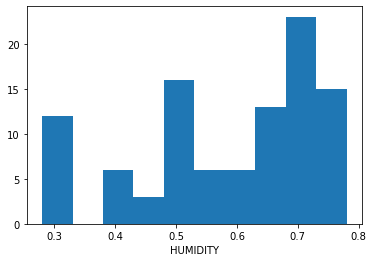

In [32]:
plt.xlabel('HUMIDITY')
plt.hist(df['humidity'])

(array([20., 34., 23., 10.,  0.,  0.,  0.,  1.,  5.,  7.]),
 array([1011.31 , 1013.323, 1015.336, 1017.349, 1019.362, 1021.375,
        1023.388, 1025.401, 1027.414, 1029.427, 1031.44 ]),
 <BarContainer object of 10 artists>)

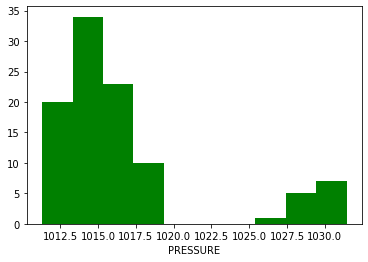

In [33]:
plt.xlabel('PRESSURE')
plt.hist(df['pressure'], color = 'Green')

(array([ 4.,  1.,  1.,  0.,  6.,  8.,  7.,  0.,  0., 73.]),
 array([ 8.06 ,  8.254,  8.448,  8.642,  8.836,  9.03 ,  9.224,  9.418,
         9.612,  9.806, 10.   ]),
 <BarContainer object of 10 artists>)

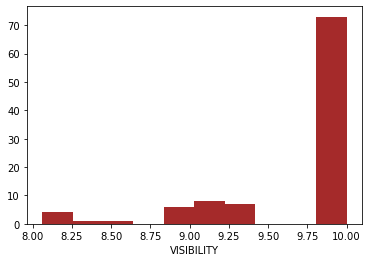

In [34]:
plt.xlabel('VISIBILITY')
plt.hist(df['visibility'], color = 'brown')

(array([ 7., 30.,  9.,  9., 12., 12.,  2., 13.,  0.,  6.]),
 array([ 3.   ,  4.431,  5.862,  7.293,  8.724, 10.155, 11.586, 13.017,
        14.448, 15.879, 17.31 ]),
 <BarContainer object of 10 artists>)

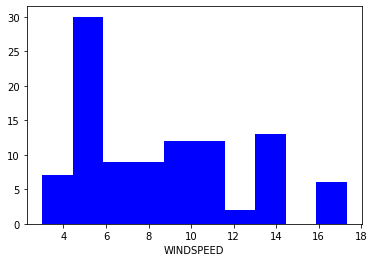

In [35]:
plt.xlabel('WINDSPEED')
plt.hist(df['windSpeed'], color = 'blue')

(array([12.,  6.,  0., 11., 21., 21., 14.,  5.,  2.,  8.]),
 array([129.9874115 , 133.31406403, 136.64071656, 139.96736909,
        143.29402162, 146.62067415, 149.94732668, 153.27397921,
        156.60063174, 159.92728427, 163.2539368 ]),
 <BarContainer object of 10 artists>)

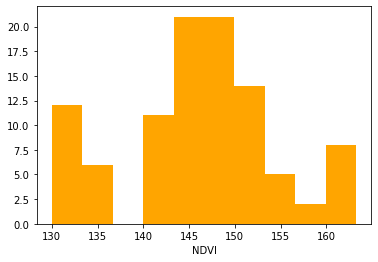

In [36]:
plt.xlabel('NDVI')
plt.hist(df['NDVI'], color = 'orange')

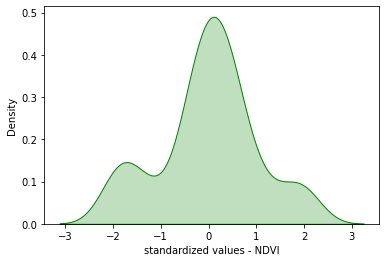

In [37]:
# Data Scaling – Standardization

#define the columns 
cols = ['humidity', 'pressure', 'visibility', 'windSpeed',
        'NDVI', 'Yield']

#Call the sklearn librart and import scaler values 
from sklearn.preprocessing import StandardScaler
 
#call the standard scaler 
std_scaler = StandardScaler()
 
#fit the values to the function 
Stand_Sc = std_scaler.fit_transform(df[cols].iloc[:,range(0,5)].values)
 
#use seaborn for KDE plot
sns.kdeplot(Stand_Sc[:,4],fill=True, color = 'Green')
 
#Label the plot 
plt.xlabel('standardized values - NDVI')
 
#Print the plot 
plt.show()        
        

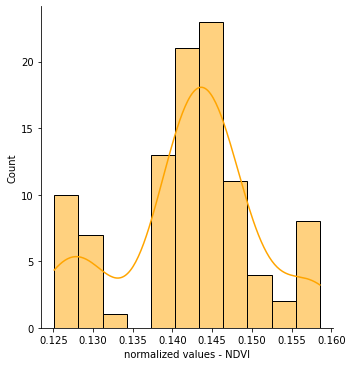

In [38]:
# Data Scaling – Normalization

#Import Normalizer from sklearn
from sklearn.preprocessing import Normalizer
 
#initialize normalizer
data_norm = Normalizer()
 
#Fit the data
Normalize = data_norm.fit_transform(df[cols].iloc[:,range(0,5)].values)
 
#Distribution plot 
#sns.displot(Normalize[:,5],fill=True, color = 'orange')
sns.displot(Normalize[:,4],fill=True, color = 'orange', kde=True)
 
#Add the axis labels 
plt.xlabel('normalized values - NDVI')
 
#Display the plot 
plt.show()

In [39]:
# Define x and y
x = df.drop(['Yield'], axis=1).values
y = df['Yield'].values

# np.isnan(x)
# np.where(np.isnan(x))
# np.nan_to_num(x)
# np.isnan(y)
# np.where(np.isnan(y))
# np.nan_to_num(y)

In [40]:
print(y)

[35.6 35.6 35.6 35.6 35.6 35.6 29.3 29.3 29.3 29.3 29.3 29.3 41.1 41.1
 41.1 41.1 41.1 41.1 36.2 36.2 36.2 36.2 36.2 36.2 21.5 21.5 21.5 21.5
 21.5 21.5 25.3 25.3 25.3 25.3 25.3 25.3 23.9 23.9 23.9 33.  33.  33.
 33.  33.  33.  25.2 25.2 25.2 25.2 25.2 25.2 40.8 40.8 40.8 40.8 40.8
 40.8 24.8 24.8 24.8 24.8 24.8 24.8 22.9 22.9 22.9 22.9 22.9 22.9 44.4
 44.4 44.4 44.4 44.4 44.4 28.5 28.5 28.5 28.5 28.5 28.5 42.2 42.2 42.2
 42.2 42.2 42.2 32.4 32.4 32.4 32.4 32.4 32.4 26.6 26.6 26.6 26.6 26.6
 26.6 22.9]


In [41]:
print(x)

[[6.90000000e-01 1.02795000e+03 1.00000000e+01 3.80000000e+00
  1.36179718e+02]
 [6.50000000e-01 1.02826000e+03 1.00000000e+01 6.03000000e+00
  1.35697540e+02]
 [6.70000000e-01 1.02829000e+03 1.00000000e+01 3.59000000e+00
  1.35676956e+02]
 [6.90000000e-01 1.02774000e+03 1.00000000e+01 5.18000000e+00
  1.35005798e+02]
 [7.00000000e-01 1.02716000e+03 9.99000000e+00 4.69000000e+00
  1.34803864e+02]
 [7.00000000e-01 1.02768000e+03 1.00000000e+01 4.86000000e+00
  1.34657471e+02]
 [5.10000000e-01 1.01505000e+03 9.95000000e+00 9.71000000e+00
  1.50427856e+02]
 [4.90000000e-01 1.01514000e+03 9.93000000e+00 1.00500000e+01
  1.50217865e+02]
 [5.00000000e-01 1.01513000e+03 9.93000000e+00 1.00100000e+01
  1.50143112e+02]
 [4.90000000e-01 1.01516000e+03 9.92000000e+00 1.01300000e+01
  1.49340576e+02]
 [5.00000000e-01 1.01543000e+03 9.93000000e+00 1.18900000e+01
  1.48109497e+02]
 [5.00000000e-01 1.01541000e+03 9.94000000e+00 1.18600000e+01
  1.48044052e+02]
 [7.00000000e-01 1.01464000e+03 9.230000

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=56)

In [43]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [45]:
ml.coef_

array([16.80385011,  0.22226315, -2.72354256,  0.68530328, -0.23533141])

In [46]:
ml.intercept_

-149.18779481161727

In [17]:
# Predict the test set results
y_pred=ml.predict(x_test)
print(y_pred)

[33.51712783 30.77285534 36.65842869 25.43563193 35.91525648 31.42668225
 34.7815695  29.45880562 26.35791    29.03953906 35.15701919 39.04325463
 42.14174762 29.14502884 33.02863104 32.69208799 27.26413709 35.08782793
 33.91752589 22.44337778 41.16816183 35.39631299 39.0838797  36.47696503
 26.80833454 29.16584706 30.91594113 26.91687046 26.69980543 34.20363146]


In [14]:
# Actual value - 35.6
ml.predict([[0.69, 1027.95, 10.00, 3.80, 136.179718 ]])

array([34.20363146])

In [15]:
# Evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6511322113491791

Text(0.5, 1.0, 'Actual vs. Predicted')

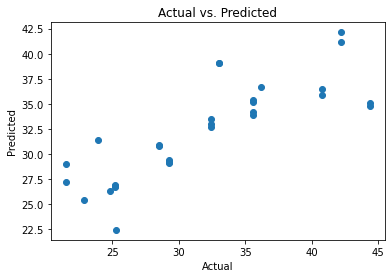

In [16]:
# Plot the results

plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')